In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/imdb-top-1000-movies/imdb_clean.csv
/kaggle/input/imdb-top-1000-movies/imdb_clean2.csv


## Importing Libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Loading Dataset

In [3]:
df = pd.read_csv('/kaggle/input/imdb-top-1000-movies/imdb_clean2.csv',index_col=0)

In [4]:
df

,title,release_year,runtime,genre,rating,metascore,gross(M)
0,The Shawshank Redemption,1994,142,Drama,9.3,82,28.34
1,The Godfather,1972,175,Crime,9.2,100,134.97
1,The Godfather,1972,175,Drama,9.2,100,134.97
2,The Dark Knight,2008,152,Action,9.0,84,534.86
2,The Dark Knight,2008,152,Crime,9.0,84,534.86
...,...,...,...,...,...,...,...
998,The Invisible Man,1933,71,Horror,7.6,87,0.00
998,The Invisible Man,1933,71,Sci-Fi,7.6,87,0.00
999,Cell 211,2009,113,Action,7.6,0,0.00
999,Cell 211,2009,113,Crime,7.6,0,0.00


## Checking Data types

In [5]:
df.dtypes

title            object
release_year      int64
runtime           int64
genre            object
rating          float64
metascore         int64
gross(M)        float64
dtype: object

## Checking for Null Values

In [6]:
df.isna().sum()

title           0
release_year    0
runtime         0
genre           0
rating          0
metascore       0
gross(M)        0
dtype: int64

## Checking for duplicates

In [7]:
df.drop_duplicates('title',inplace=True)

In [8]:
df

,title,release_year,runtime,genre,rating,metascore,gross(M)
0,The Shawshank Redemption,1994,142,Drama,9.3,82,28.34
1,The Godfather,1972,175,Crime,9.2,100,134.97
2,The Dark Knight,2008,152,Action,9.0,84,534.86
3,Schindler's List,1993,195,Biography,9.0,95,96.90
4,12 Angry Men,1957,96,Crime,9.0,97,4.36
...,...,...,...,...,...,...,...
995,Philomena,2013,98,Biography,7.6,77,37.71
996,Control,2007,122,Biography,7.6,78,0.87
997,A Very Long Engagement,2004,133,Drama,7.6,76,6.17
998,The Invisible Man,1933,71,Horror,7.6,87,0.00


## Data Visualization

**Distribution of top movies by year**

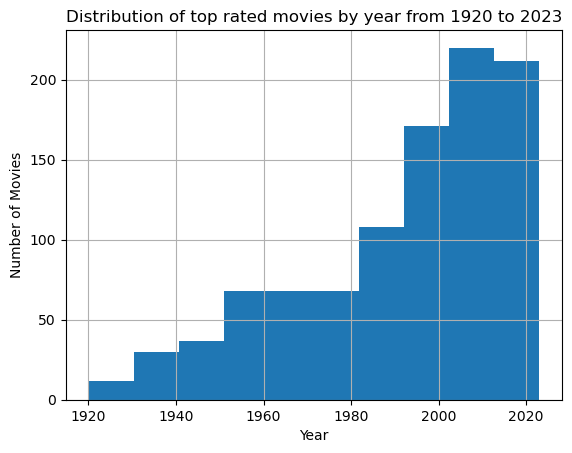

In [9]:
plt.hist(df['release_year'])
plt.title('Distribution of top rated movies by year from '+str(df['release_year'].min())+ ' to '+str(df['release_year'].max()))
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.grid(True)
plt.show()

*Observation: Most of the Top rated movies are released recently in 21st Centuary.*

**Count of Genere**

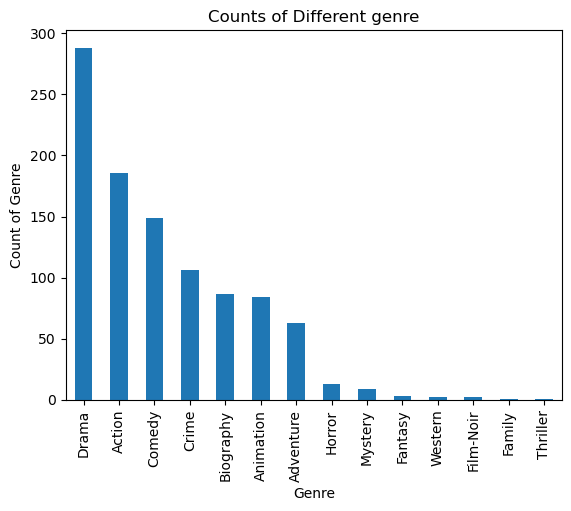

In [10]:
df['genre'].value_counts().plot(kind='bar',title='Counts of Different genre',xlabel='Genre',ylabel='Count of Genre')
plt.show()

*Observation : Top rated movies are mainly from Darma, Action, Comedy, Crime genre.*

**Counts of Genre by Year**

In [11]:
release_year_vs_genre= df.pivot_table(values='title',index='release_year',columns='genre',aggfunc=np.count_nonzero,margins=True)
release_year_vs_genre

genre,Action,Adventure,Animation,Biography,Comedy,Crime,Drama,Family,Fantasy,Film-Noir,Horror,Mystery,Thriller,Western,All
release_year,,,,,,,,,,,,,,,
1920,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1
1921,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1922,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1
1924,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1925,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020,1.0,NaN,3.0,1.0,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9
2021,4.0,NaN,1.0,1.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10
2022,10.0,1.0,1.0,1.0,1.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16


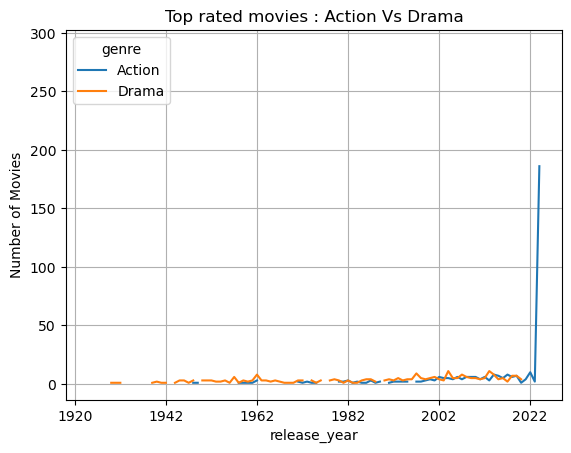

In [12]:
release_year_vs_genre.loc[:,['Action','Drama']].plot(ylabel='Number of Movies', title='Top rated movies : Action Vs Drama')
plt.grid(True)
plt.show()

*Observation: In recent years,popularity of Action genre increased darstically.*

**Distribution of Movies rating**

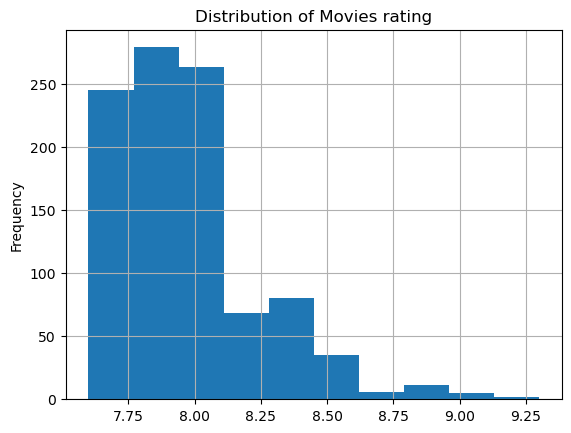

In [13]:
df['rating'].plot(kind='hist',title='Distribution of Movies rating')
plt.grid(True)
plt.show()

**Distribution of MetaScore**

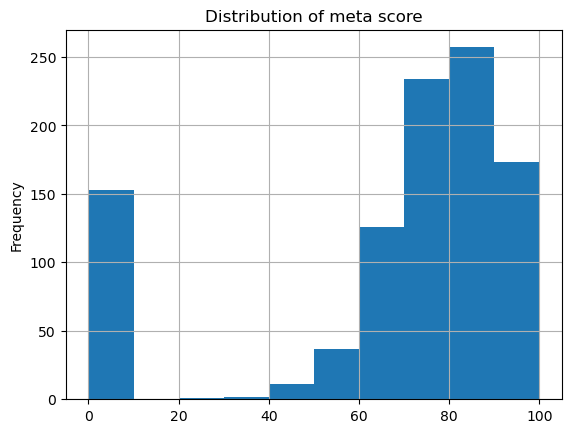

In [14]:
df['metascore'].plot(kind='hist',title='Distribution of meta score',grid=True)
plt.show()

## Top rated Movie of Each Year

In [15]:
highest_rating_vs_year=df.pivot_table(values='rating',index='release_year',aggfunc=max)
index_level=0
topmost_movie_vs_year_data = pd.DataFrame()  #Creating Empty data frame
for i in highest_rating_vs_year['rating']:
    topmost_movie_vs_year = df[(df['release_year']==highest_rating_vs_year.index[index_level]) & (df['rating']==i)][['release_year','title','rating','genre','runtime']]
    index_level = index_level+1
    topmost_movie_vs_year_data = pd.concat([topmost_movie_vs_year_data,topmost_movie_vs_year],ignore_index=True)
pd.set_option('display.max_rows',150)

In [16]:
from IPython.display import display, HTML
display(HTML(topmost_movie_vs_year_data.to_html()))

,release_year,title,rating,genre,runtime
0,1920,The Cabinet of Dr. Caligari,8.0,Horror,67
1,1921,The Kid,8.3,Comedy,68
2,1922,Nosferatu,7.9,Fantasy,94
3,1924,Sherlock Jr.,8.2,Action,45
4,1925,The Gold Rush,8.1,Adventure,95
5,1926,The General,8.1,Action,78
6,1927,Metropolis,8.3,Drama,153
7,1928,The Passion of Joan of Arc,8.2,Biography,114
8,1930,All Quiet on the Western Front,8.1,Drama,152
9,1931,City Lights,8.5,Comedy,87
